In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None 

In [221]:
#order_products_train_df = pd.read_csv("input/order_products__train.csv")
order_products_prior_df = pd.read_csv("input/order_products__prior.csv",names=['order_id','product_id','add_to_cart_order','reordered'])
orders_df = pd.read_csv("input/orders.csv")
products_df = pd.read_csv("input/products 2.csv",names=['product_id','product_name','aisle_id','department_id'])
aisles_df = pd.read_csv("input/aisles.csv")
departments_df = pd.read_csv("input/departments.csv")

In [149]:
len(departments_df.department.unique())

413

In [150]:
departments_df.dtypes

department_id     int64
department       object
dtype: object

In [222]:
d = {'department_id':-1,'department':'OTHERS'}
departments_df=departments_df.append(pd.DataFrame(data=d,index=[0]))
departments_df = departments_df.reset_index(drop=True)

In [223]:
orders_df['order_number']= orders_df['order_number'].apply(lambda x:x+1)

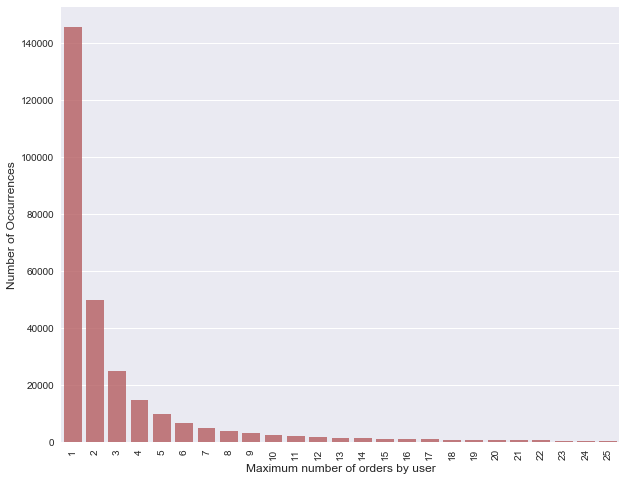

In [337]:
#maximum order number vs no. of occurences

cnt_srso = orders_df.groupby(['user_id'])['order_number'].aggregate(np.max).reset_index()
cnt_srs = cnt_srso[cnt_srso['order_number']<26]
cnt_srs = cnt_srs.order_number.value_counts()
plt.figure(figsize=(10,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum number of orders by user', fontsize=12)
plt.xticks(rotation='vertical')
plt.savefig('images/1.png')

#plt.figure(figsize=(12,8))
#a = [x for x in range(100,551,25)]
#plt.hist(cnt_srso['order_number'],bins=a)
#plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('Maximum order number by user', fontsize=12)
#plt.xticks(rotation='vertical')
#plt.show()

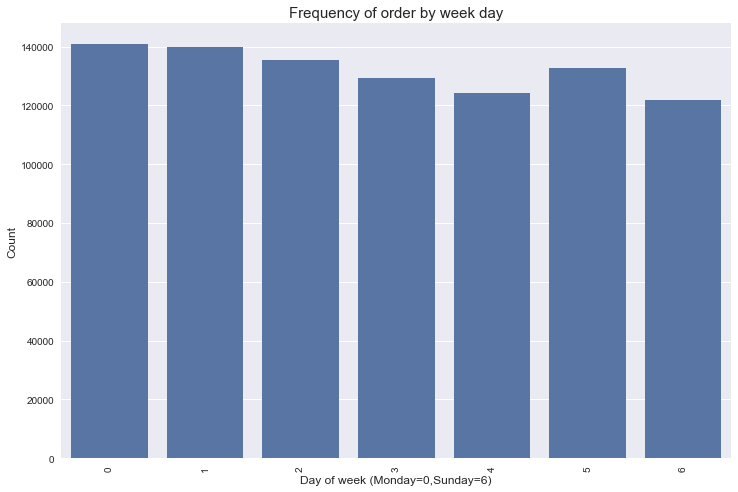

In [261]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week (Monday=0,Sunday=6)', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.savefig('images/2.png')

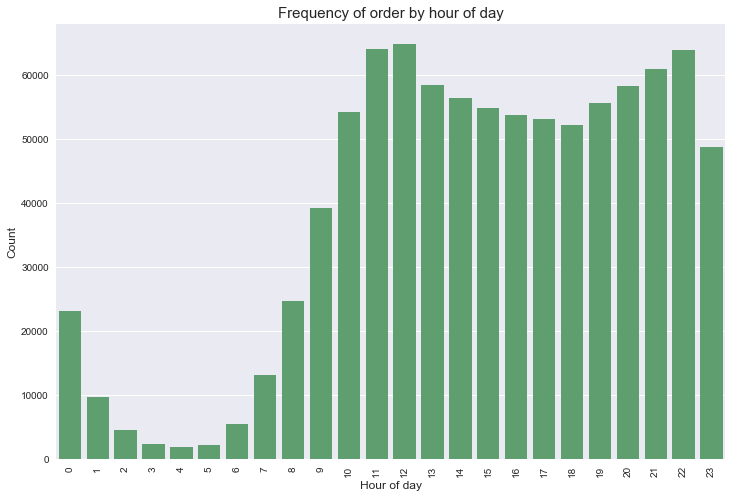

In [232]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.savefig('images/3.png')

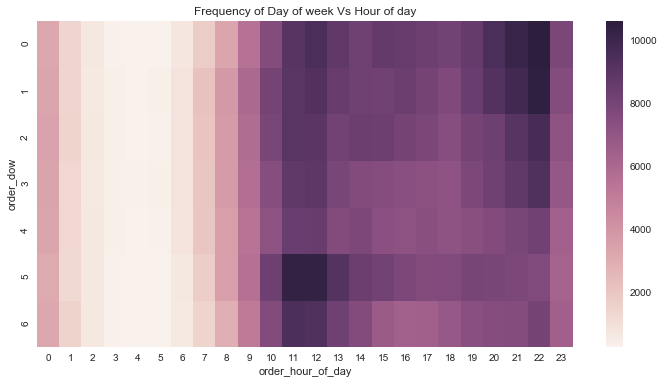

In [233]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.savefig('images/0.png')

In [335]:
user=list(set(orders_df[orders_df.days_since_prior_order==2].user_id))[:10]
user_10 = orders_df[orders_df['user_id'].isin(user)].reset_index(drop=True)
user_10.to_csv('user_2.csv')

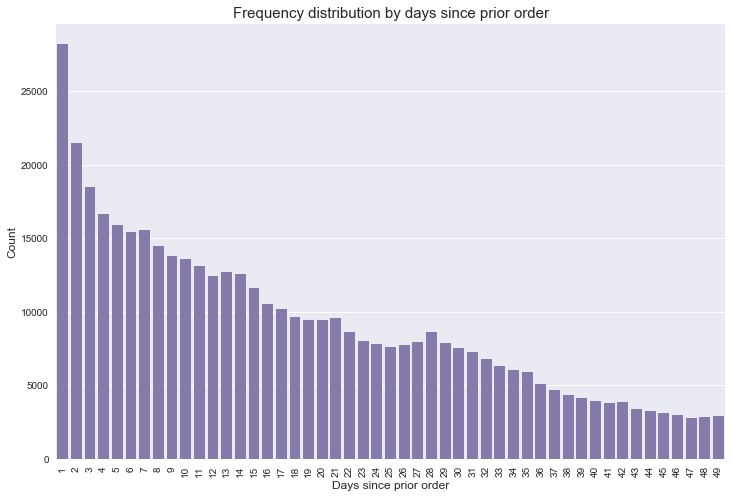

In [234]:
plt.figure(figsize=(12,8))
data = orders_df[(orders_df.days_since_prior_order>0) & (orders_df.days_since_prior_order<50)]
sns.countplot(x="days_since_prior_order", data=data, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [109]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.38738659774653067

In [94]:
#on an average, 39% of the products are reordered

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


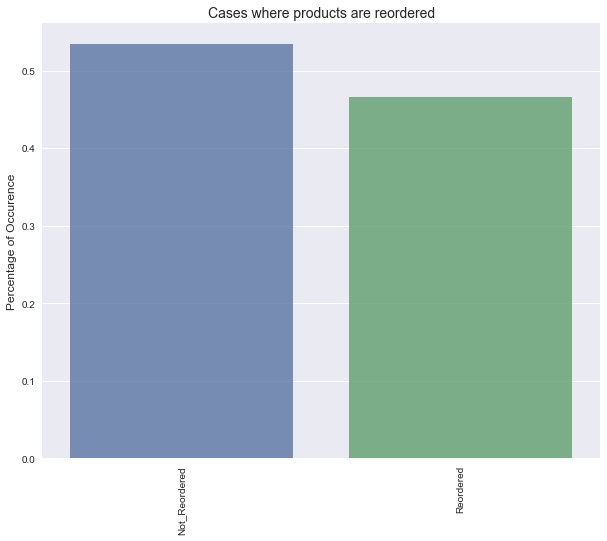

In [262]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].ix[grouped_df["reordered"]>1] = 1
cnt_srs = (grouped_df.reordered.value_counts() / grouped_df.shape[0])
plt.figure(figsize=(10,8))
sns.barplot(['Not_Reordered','Reordered'], cnt_srs.values, alpha=0.8)
plt.ylabel('Percentage of Occurence', fontsize=12)
plt.xlabel('', fontsize=14)
plt.xticks(rotation='vertical')
plt.title('Cases where products are reordered',fontsize=14)
plt.savefig('images/4.png')


In [96]:
#about 53% of the order has no re-ordered items

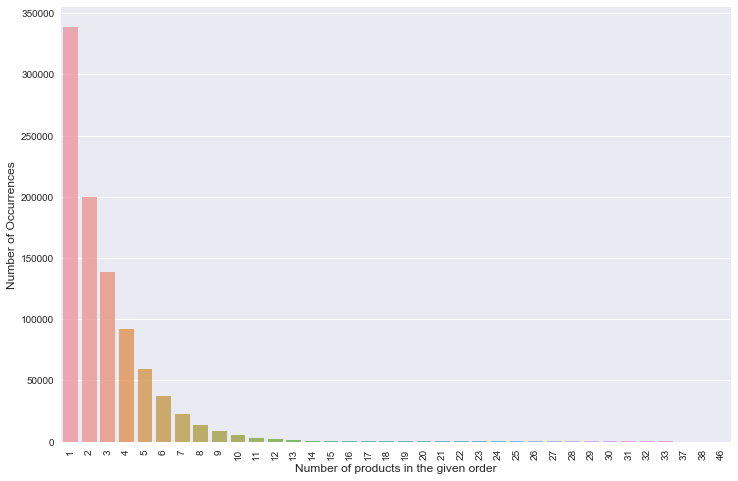

In [240]:
grouped_df = order_products_prior_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.savefig('images/5.png')

In [245]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,PO30016365889391,147689,1,0,SOFTDROPS LUBRICATING EYE DROP,13,57,OPHTHAL,Dry eye
1,PO30016365889391,125423,2,0,DORZOX 2% EYE DROP,13,261,OPHTHAL,Glaucoma (High eye pressure)
2,PO30016365889391,328062,3,0,TENLIMAC 20MG TABLET,10,50,ANTI DIABETIC,Type 2 diabetes
3,PO32716611589356,150801,1,0,LUPISULIN R 100IU CARTRIDGE,10,50,ANTI DIABETIC,Type 2 diabetes
4,PO33016244043882,15026,1,0,TORLEVA 500MG TABLET,3,3,NEURO CNS,Epilepsy


In [321]:
from functools import partial

indexes = np.linspace(0, len(order_products_prior_df), num=10, dtype=np.int32)

# initialize it with train dataset
order_details = pd.merge(
                left=order_products_prior_df,
                 right=orders_df, 
                 how='left', 
                 on='order_id'
        ).apply(partial(pd.to_numeric, errors='ignore', downcast='integer'))

# add order hierarchy
order_details = pd.merge(
                left=order_details,
                right=goods[['product_id', 
                             'aisle_id', 
                             'department_id']].apply(partial(pd.to_numeric, 
                                                             errors='ignore', 
                                                             downcast='integer')),
                how='left',
                on='product_id'
)

In [322]:
order_details

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id_x,department_id_x,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id_y,department_id_y
0,PO30016365889391,147689,1,0,SOFTDROPS LUBRICATING EYE DROP,13.0,57.0,OPHTHAL,Dry eye,+9111999091@p1895.33mail.com,prior,1,3,15,0,13.0,57.0
1,PO30016365889391,125423,2,0,DORZOX 2% EYE DROP,13.0,261.0,OPHTHAL,Glaucoma (High eye pressure),+9111999091@p1895.33mail.com,prior,1,3,15,0,13.0,261.0
2,PO30016365889391,328062,3,0,TENLIMAC 20MG TABLET,10.0,50.0,ANTI DIABETIC,Type 2 diabetes,+9111999091@p1895.33mail.com,prior,1,3,15,0,10.0,50.0
3,PO32716611589356,150801,1,0,LUPISULIN R 100IU CARTRIDGE,10.0,50.0,ANTI DIABETIC,Type 2 diabetes,+9111999091@p1895.33mail.com,prior,2,2,22,27,10.0,50.0
4,PO33016244043882,15026,1,0,TORLEVA 500MG TABLET,3.0,3.0,NEURO CNS,Epilepsy,+9111999091@p1895.33mail.com,prior,3,5,12,3,3.0,3.0
5,PO33016244043882,328815,2,0,AMLOKIND-AT TABLET,2.0,-1.0,CARDIAC,OTHERS,+9111999091@p1895.33mail.com,prior,3,5,12,3,2.0,-1.0
6,PO33016244043882,330260,3,0,ARKAMIN 100MCG TABLET,2.0,347.0,CARDIAC,Opioid withdrawal,+9111999091@p1895.33mail.com,prior,3,5,12,3,2.0,347.0
7,PO33016244043882,75289,4,0,CLOPITAB-A 75 CAPSULE,2.0,-1.0,CARDIAC,OTHERS,+9111999091@p1895.33mail.com,prior,3,5,12,3,2.0,-1.0
8,PO35216178946048,15026,1,1,TORLEVA 500MG TABLET,3.0,3.0,NEURO CNS,Epilepsy,+9111999091@p1895.33mail.com,prior,4,6,10,22,3.0,3.0
9,PO35216178946048,328014,2,0,IODEX BALM,0.0,-1.0,NaN,OTHERS,+9111999091@p1895.33mail.com,prior,4,6,10,22,0.0,-1.0


In [323]:
#is_otc = pd.read_csv('skus_is_prescription.csv')
#is_otc['product_id']=list(is_otc.id)
order_details = order_details.merge(is_otc,on='product_id',how='left')
order_details.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id_x,department_id_x,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id_y,department_id_y,id,otc1,otc
0,PO30016365889391,147689,1,0,SOFTDROPS LUBRICATING EYE DROP,13.0,57.0,OPHTHAL,Dry eye,+9111999091@p1895.33mail.com,prior,1,3,15,0,13.0,57.0,147689.0,True,False
1,PO30016365889391,125423,2,0,DORZOX 2% EYE DROP,13.0,261.0,OPHTHAL,Glaucoma (High eye pressure),+9111999091@p1895.33mail.com,prior,1,3,15,0,13.0,261.0,125423.0,False,False
2,PO30016365889391,328062,3,0,TENLIMAC 20MG TABLET,10.0,50.0,ANTI DIABETIC,Type 2 diabetes,+9111999091@p1895.33mail.com,prior,1,3,15,0,10.0,50.0,328062.0,False,False
3,PO32716611589356,150801,1,0,LUPISULIN R 100IU CARTRIDGE,10.0,50.0,ANTI DIABETIC,Type 2 diabetes,+9111999091@p1895.33mail.com,prior,2,2,22,27,10.0,50.0,150801.0,False,False
4,PO33016244043882,15026,1,0,TORLEVA 500MG TABLET,3.0,3.0,NEURO CNS,Epilepsy,+9111999091@p1895.33mail.com,prior,3,5,12,3,3.0,3.0,15026.0,False,False


In [314]:
otc = pd.read_csv('is_otc.csv')

In [319]:
is_otc = pd.read_csv('skus_is_prescription.csv')
is_otc['otc1']=False
is_otc = is_otc.merge(otc,on='id',how='outer')
is_otc['otc1'].fillna(True,inplace=True)
is_otc['product_id']=list(is_otc.id)

CPU times: user 1.27 s, sys: 314 ms, total: 1.58 s
Wall time: 1.83 s


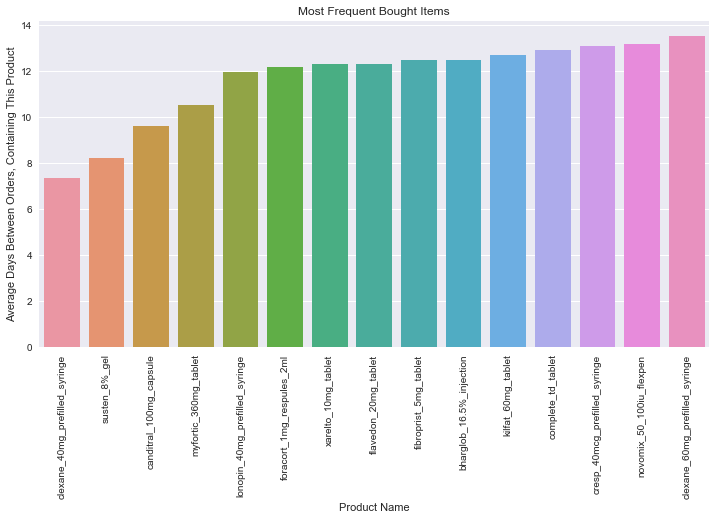

In [325]:
%%time
# most "frequently" bought products (total set, not only train)
# most "frequently" ~ time between orders (within selected customer's orders), 
# that contain that product, is the least 
#(products, which were bought by more than 100 customers, to omit outliers)
top = 15
customer_limit = 100

temp = order_details[order_details.otc1==False].groupby(['product_id'])[['days_since_prior_order', 'user_id']]\
.aggregate({'days_since_prior_order': np.mean, 'user_id': len}).reset_index()

frequent_products = pd.merge(
    left=pd.DataFrame(temp[temp.user_id > customer_limit].sort_values(['days_since_prior_order'], 
                                                                      ascending=True)[:top]),
    right=goods,
    how='left')

plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
sns.barplot(frequent_products.product_name, frequent_products.days_since_prior_order)
plt.ylabel('Average Days Between Orders, Containing This Product')
plt.xlabel('Product Name')
plt.title('Most Frequent Bought Items')
plt.savefig('images/6.png')

del temp

We can see that longer lags leads to lowered probability (new items),
while same day orders tends to have more overlapped product list


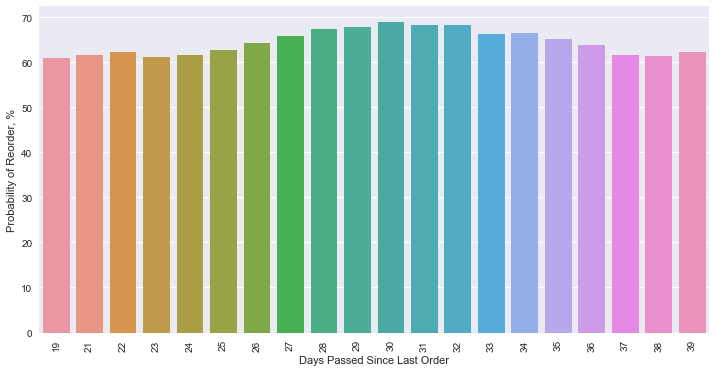

In [263]:
por = order_details.dropna(axis=0, subset=['days_since_prior_order'])\
.groupby('days_since_prior_order')['reordered'].aggregate("mean").reset_index().sort_values(by='reordered',ascending=[False]).iloc[5:25,:].reset_index(drop=True)

print('We can see that longer lags leads to lowered probability (new items),\
\nwhile same day orders tends to have more overlapped product list')

plt.figure(figsize=(12, 6))
sns.barplot(por.days_since_prior_order, por.reordered*100)
plt.xticks(rotation='vertical')
plt.ylabel('Probability of Reorder, %')
plt.xlabel('Days Passed Since Last Order')
#plt.title('images/7.png')
pass

In [202]:
%%time
# most "frequently" bought products (total set, not only train)
# most "frequently" ~ time between orders (within selected customer's orders), 
# that contain that product, is the least 
#(products, which were bought by more than 100 customers, to omit outliers)
top = 15
customer_limit = 100

temp = order_details.groupby(['product_id'])[['days_since_prior_order', 'user_id']]\
.aggregate({'days_since_prior_order': np.mean, 'user_id': len}).reset_index()

frequent_products = pd.merge(
    left=pd.DataFrame(temp[temp.user_id > customer_limit].sort_values(['days_since_prior_order'], 
                                                                      ascending=True)[:top]),
    right=goods,
    how='left')

plt.figure(figsize=(12,6))
plt.xticks(rotation='vertical')
sns.barplot(frequent_products.product_name, frequent_products.days_since_prior_order)
plt.ylabel('Average Days Between Orders, Containing This Product')
plt.xlabel('Product Name')


,product_id,product_name,aisle_id,department_id,department,aisle
0,1295,auramine_rhodamine_stain,0,-1,NaN,NaN
1,1296,chlamydia_trachomatis_igg,0,-1,NaN,NaN
2,1297,thyroxine_binding_globulin,0,-1,NaN,NaN
3,1298,absolute_lymphocyte_count,0,-1,NaN,NaN
4,1299,pro_arthritis_package_(includes_55_tests),0,-1,NaN,NaN


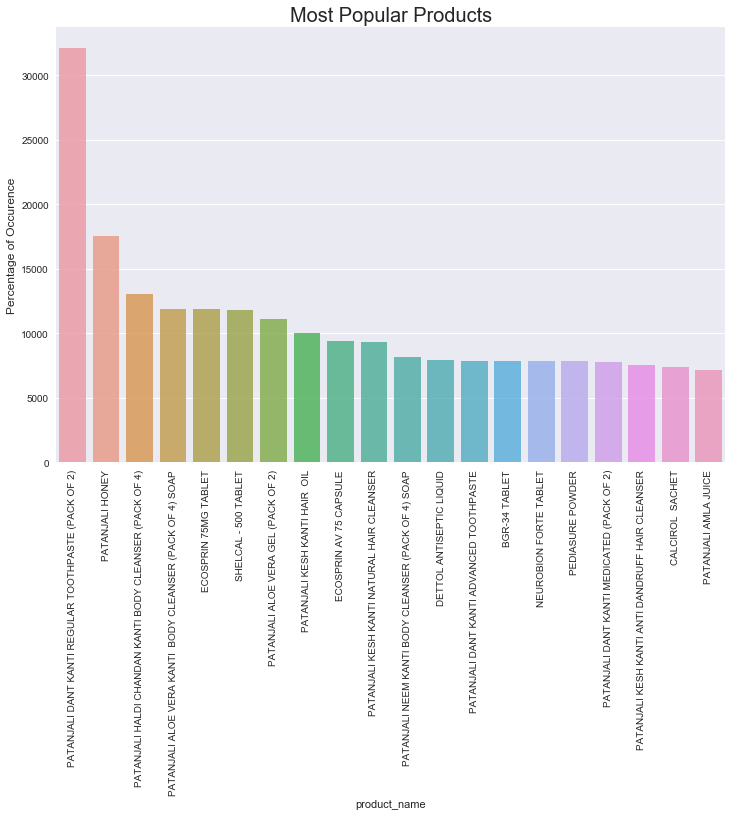

In [250]:
#frequency of products in all the orders

cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.product_name, cnt_srs.frequency_count, alpha=0.8)
plt.ylabel('Percentage of Occurence', fontsize=12)
#plt.xlabel('R', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Most Popular Products',fontsize=20)
plt.savefig('images/7.png')

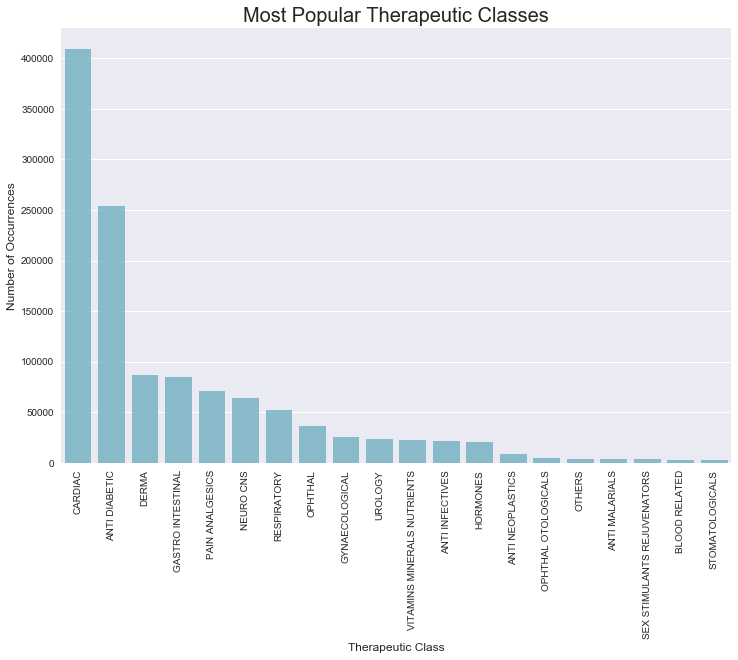

In [252]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Therapeutic Class', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Most Popular Therapeutic Classes',fontsize=20)
plt.savefig('images/8.png')

In [ ]:
#Cardiac is the largest therapeutic class for which products are purchased

In [257]:
temp_series

OTHERS                                                                                                1739430
 Type 2 diabetes                                                                                       125755
 Increased blood pressure                                                                              118500
 Increased triglycerides levels in blood                                                                60095
 Migraine                                                                                               29220
 Stomach ulcers                                                                                         26654
 rheumatic pain                                                                                         20326
 Heart attack                                                                                           19340
 Fungal infections                                                                                      16772
 Hair loss

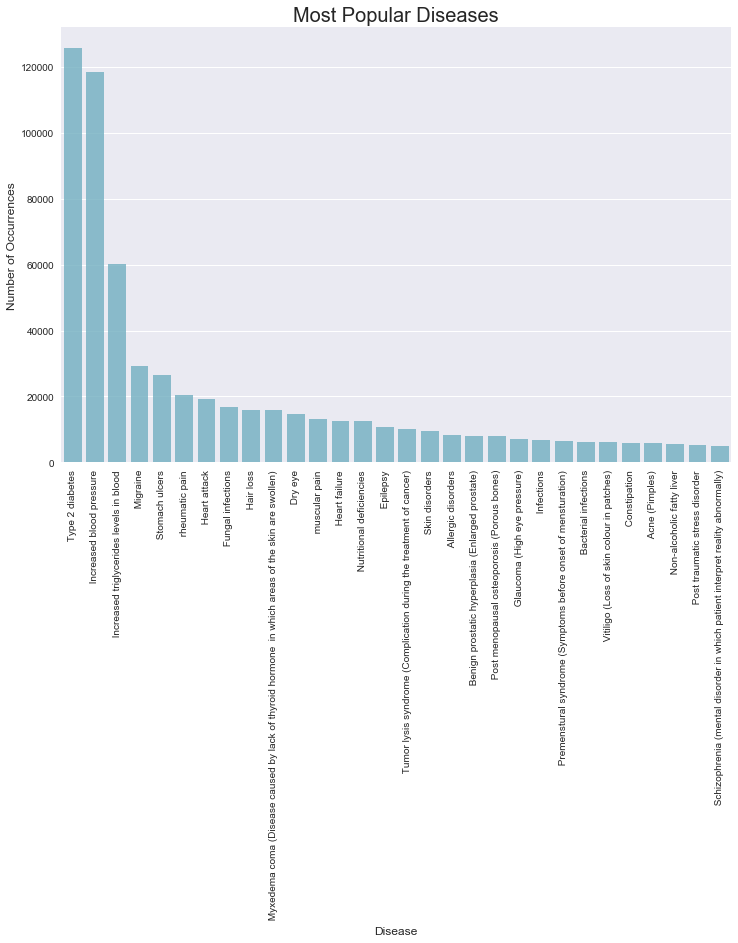

In [258]:
plt.figure(figsize=(12,8))
temp_series = order_products_prior_df[order_products_prior_df.department!='OTHERS']['department'].value_counts().head(30)
sns.barplot(temp_series.index, temp_series.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Disease', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Most Popular Diseases',fontsize=20)
plt.savefig('images/9.png')

In [296]:
df_temp = pd.DataFrame(data=None)
df_temp['department']=temp_series.index
df_temp['count']=temp_series.values
ar = []
for i in range(len(df_temp.department)):
    ar.append('%s.'%(i+1)+str(df_temp.department[i]))
    
df_temp = 

['1. Type 2 diabetes',
 '2. Increased blood pressure',
 '3. Increased triglycerides levels in blood',
 '4. Migraine',
 '5. Stomach ulcers',
 '6. rheumatic pain',
 '7. Heart attack',
 '8. Fungal infections',
 '9. Hair loss',
 '10. Myxedema coma (Disease caused by lack of thyroid hormone  in which areas of the skin are swollen)',
 '11. Dry eye',
 '12. muscular pain',
 '13. Heart failure',
 '14. Nutritional deficiencies',
 '15. Epilepsy',
 '16. Tumor lysis syndrome (Complication during the treatment of cancer)',
 '17. Skin disorders',
 '18. Allergic disorders',
 '19. Benign prostatic hyperplasia (Enlarged prostate)',
 '20. Post menopausal osteoporosis (Porous bones)',
 '21. Glaucoma (High eye pressure)',
 '22. Infections',
 '23. Premenstural syndrome (Symptoms before onset of mensturation)',
 '24. Bacterial infections',
 '25. Vitiligo (Loss of skin colour in patches)',
 '26. Constipation',
 '27. Acne (Pimples)',
 '28. Non-alcoholic fatty liver',
 '29. Post traumatic stress disorder',
 '30

In [180]:
#Type-2 Diabetes is the most common disease for which products are ordered

In [297]:
grouped_df = order_products_prior_df.merge(df_temp,on='department',how='inner',sort=False).sort_values(by='count',ascending=[False])

In [301]:
grouped_df.merge(df_temp,on='department',how='inner')

,department,reordered,count
0,Acne (Pimples),0.221230,5822
1,Allergic disorders,0.299656,8423
2,Bacterial infections,0.152416,6292
3,Benign prostatic hyperplasia (Enlarged prostate),0.565003,8115
4,Constipation,0.374658,5856
5,Dry eye,0.380361,14644
6,Epilepsy,0.565385,10660
7,Fungal infections,0.225316,16772
8,Glaucoma (High eye pressure),0.561341,7067
9,Hair loss,0.370644,15813


In [289]:
grouped_df = order_products_prior_df.merge(df_temp,on='department',how='right',sort=False).sort_values(by='count',ascending=[False]).groupby(["department"])#["reordered"].aggregate("mean")
grouped_df

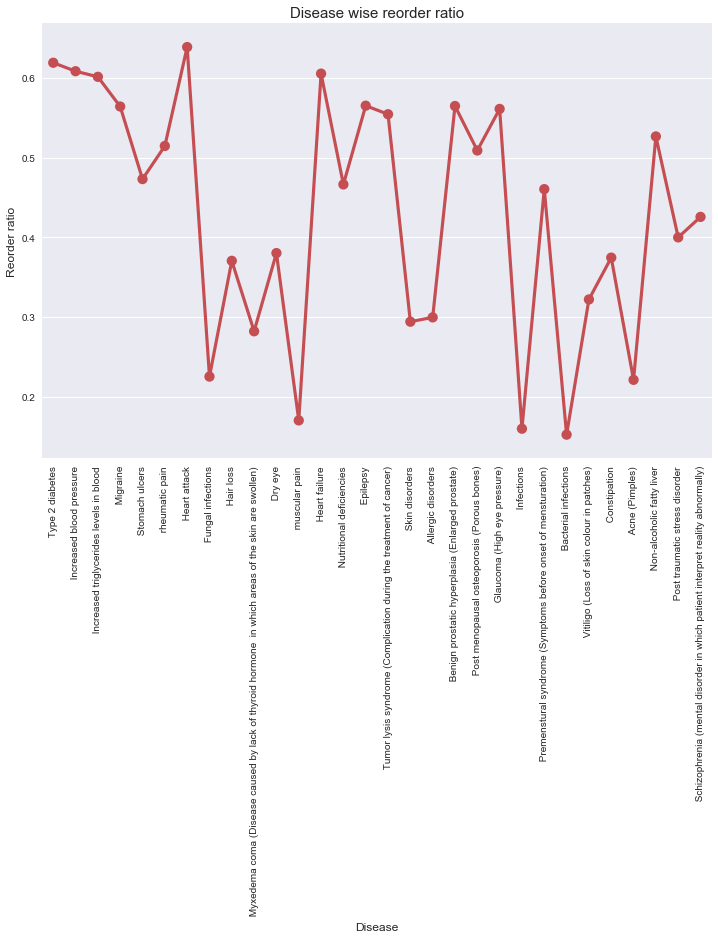

In [302]:
#Disease wise reorder ratio

grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()
grouped_df=grouped_df.merge(df_temp,on='department',how='inner').sort_values(by='count',ascending=[False]).reset_index()
plt.figure(figsize=(12,8))

sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Disease', fontsize=12)
plt.title("Disease wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.savefig('images/10.png')


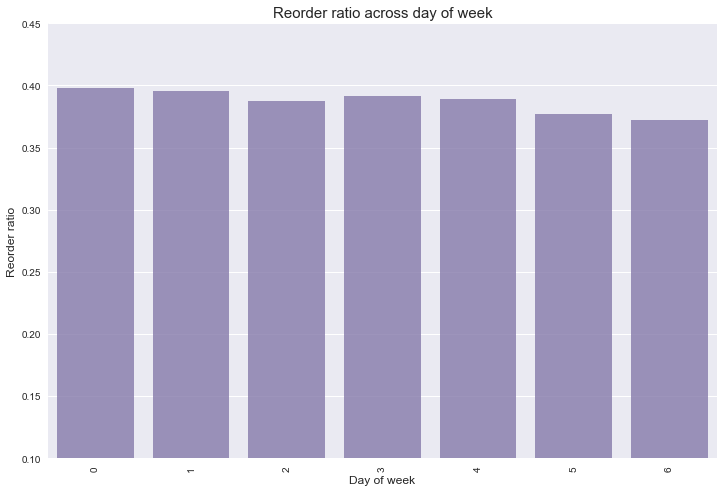

In [197]:
#Reorder Ratio by Time-based variables

order_products_train_df = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.1, 0.45)
plt.show()

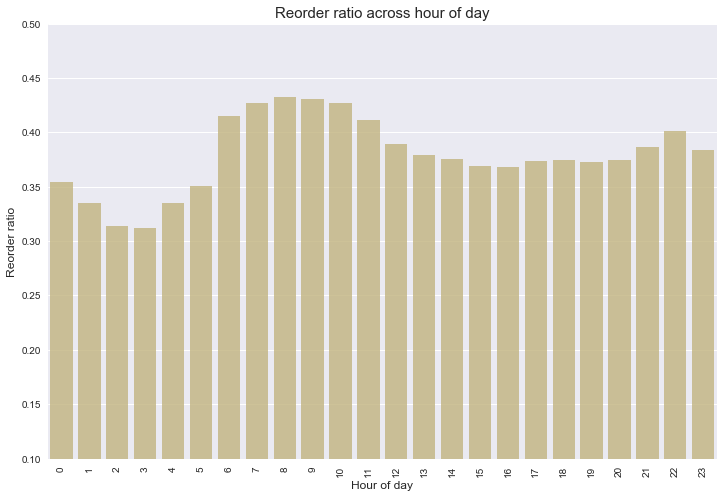

In [199]:
#Distribution across hours of day
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.1, 0.5)
plt.show()

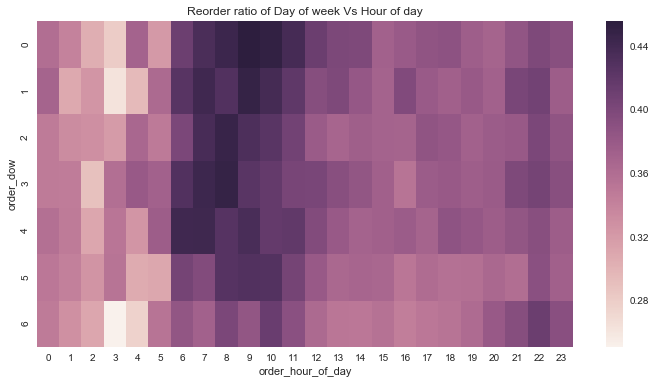

In [260]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.savefig('images/11.png')